# **Imports**

In [1]:
# Run this first to ensure autoreload
%load_ext autoreload
%autoreload 2


In [2]:
from utils.style_utils import styled_print
from preprocessing.eda import run_eda, visualize_data # Run EDA summary
from preprocessing.data_loader import (
    load_data, preprocess_data, split_data, scale_data, print_split_summary
)
from preprocessing.resampling.smote import apply_smote

from IPython.display import display

import sys
import os
sys.path.append(os.path.abspath("."))


# Dataset path 
DATA_PATH = "creditcard.csv"

In [3]:
import warnings

# Ignore FutureWarnings and UserWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# **Step 1: Exploratory Data Analysis (EDA)**

In [41]:
# Run EDA
df = run_eda()


(284807, 31)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Class
0    284315
1       492
Name: count, dtype: int64


/Users/kawtherab/Desktop/credit_card_fraud/preprocessing/eda.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  


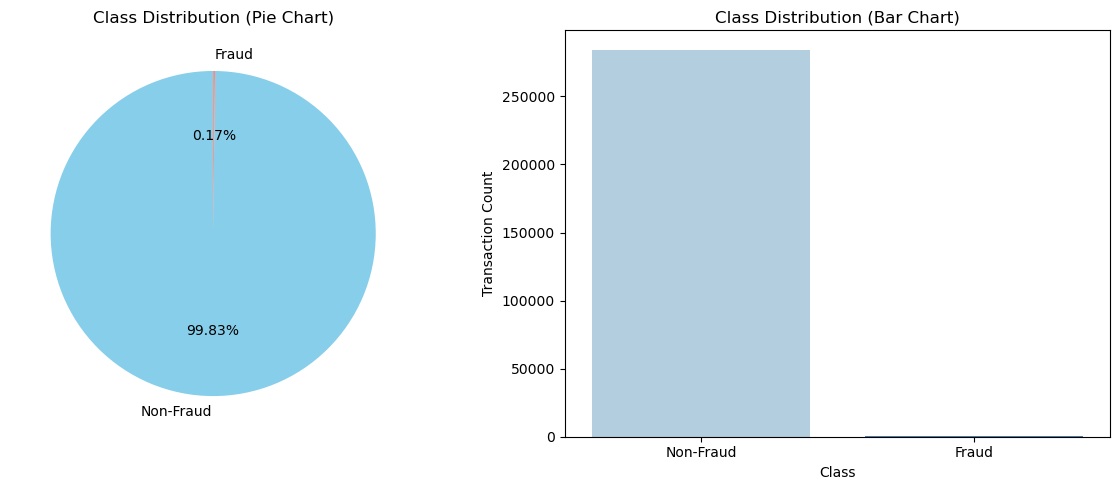

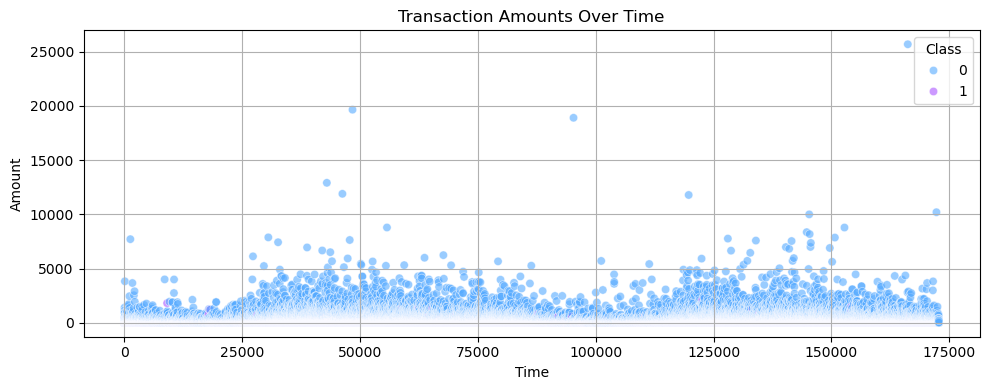

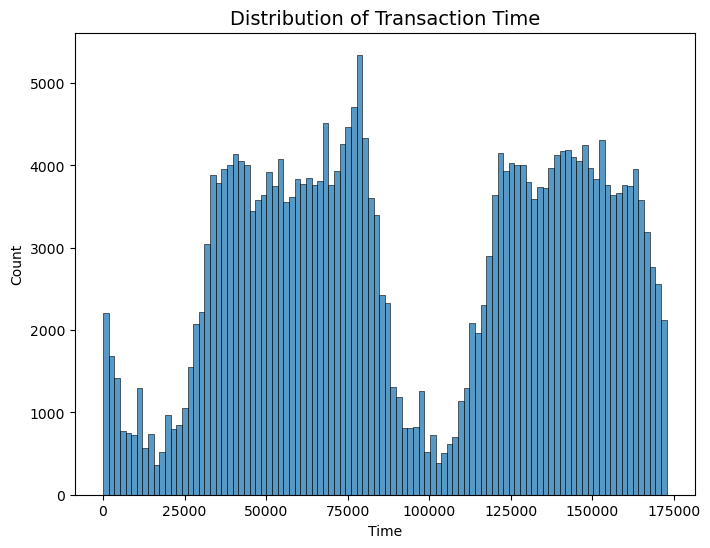

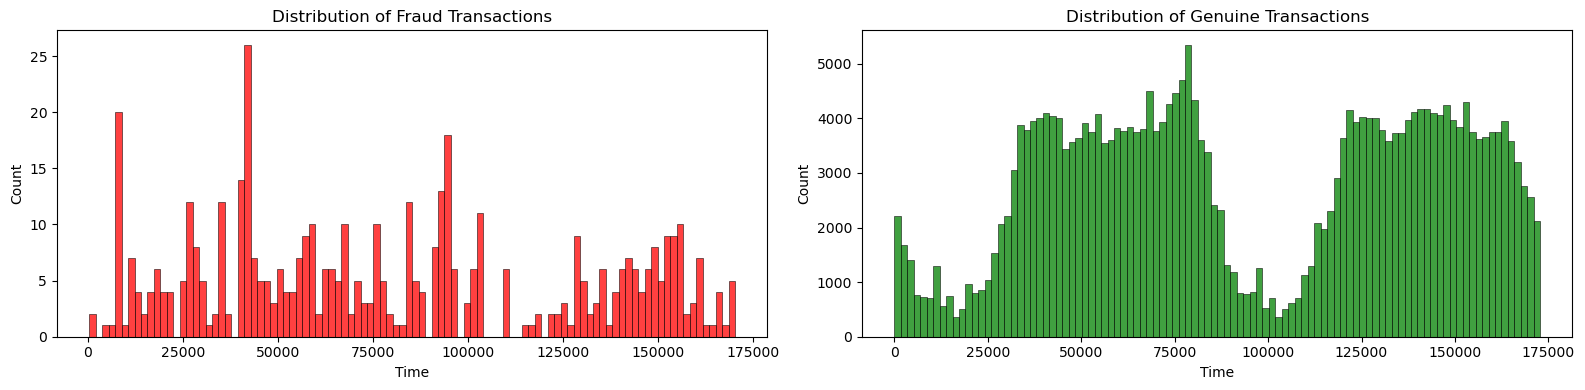

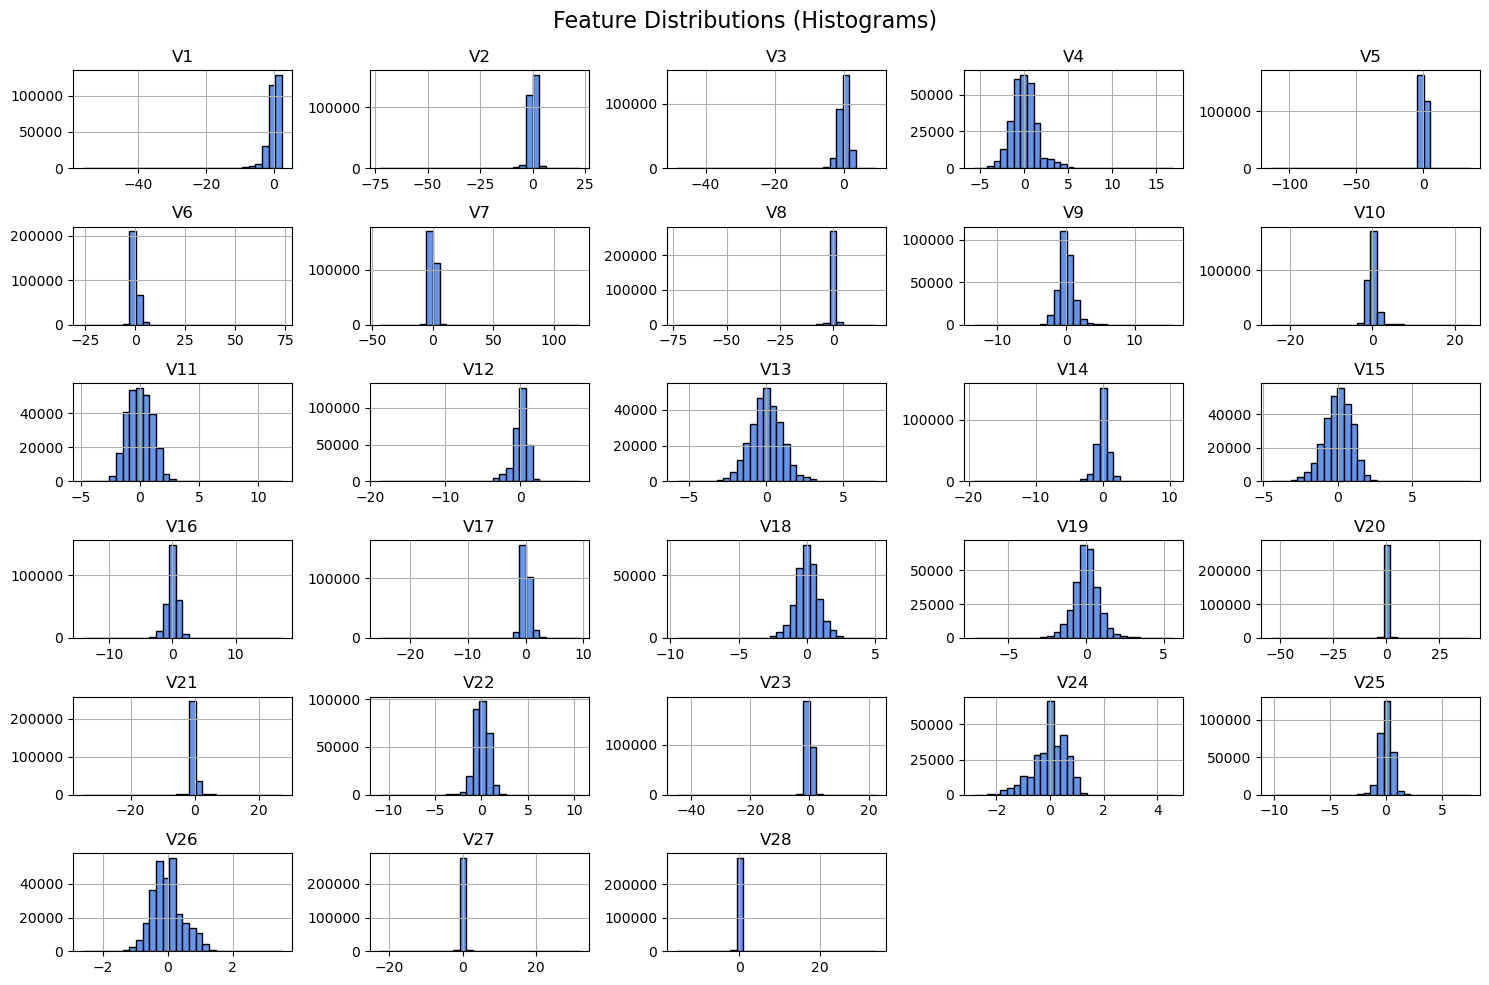

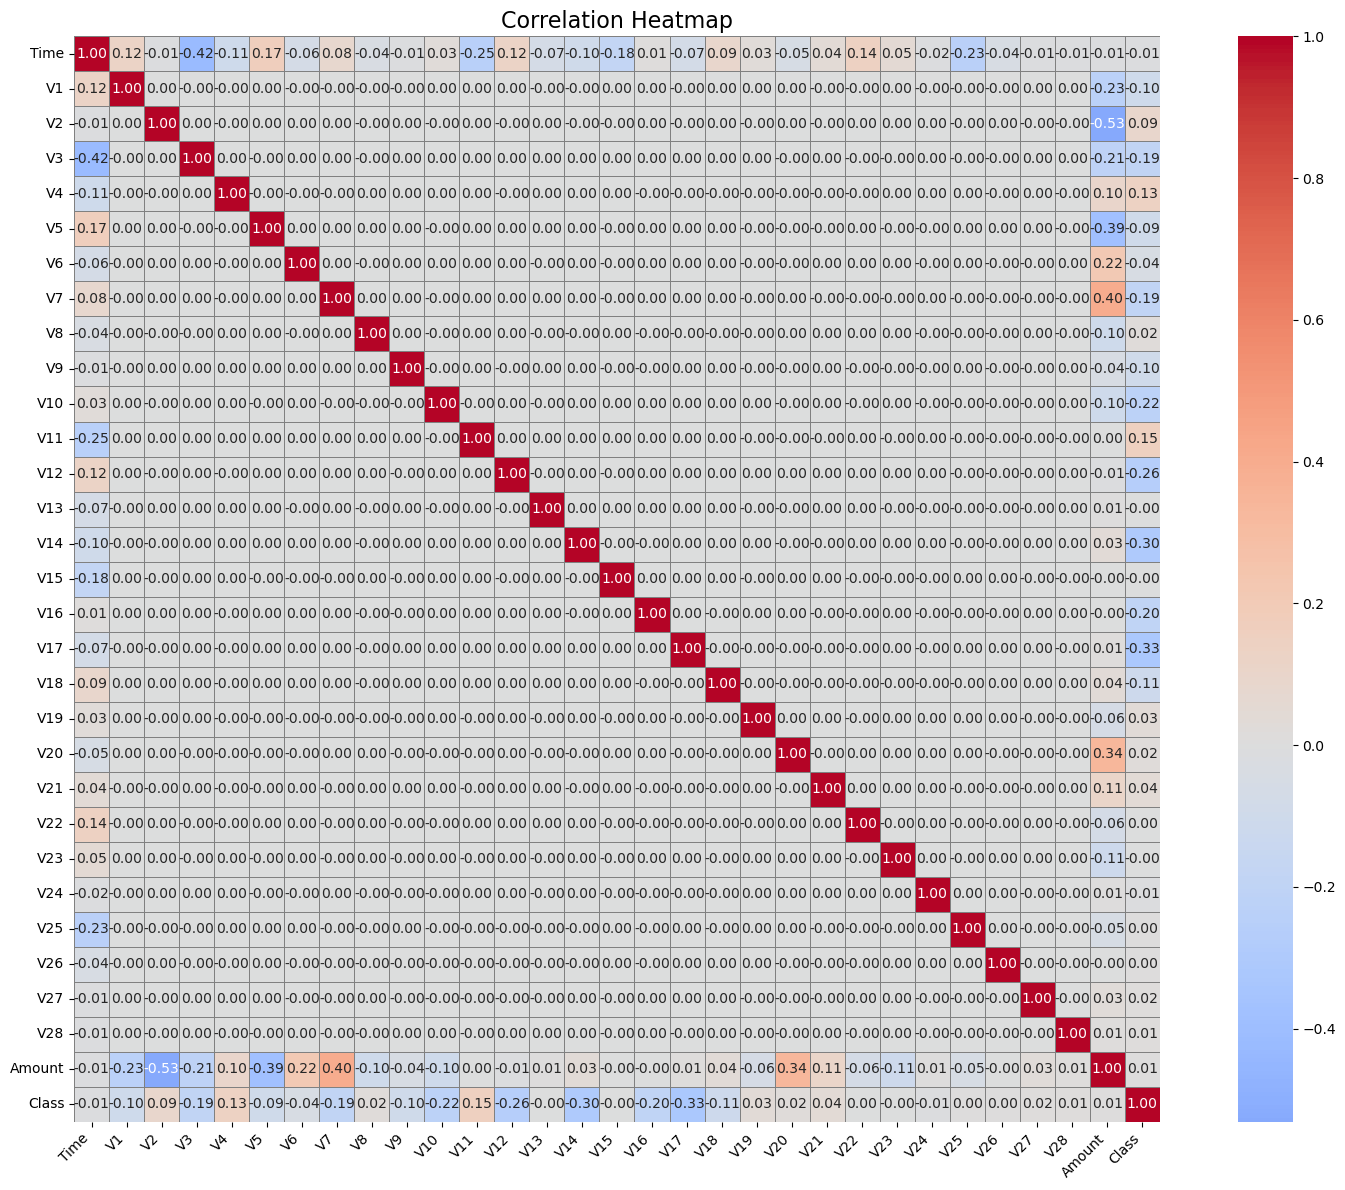

In [42]:

visualize_data(df)  # This will show plots: class distribution, scatterplots, histograms, heatmap

# **Step 2: Data preprocessing**


### **1. Load and Preprocess Data**

In [4]:
#  Step 1: Load and Preprocess Data
df = load_data()
df = preprocess_data(df)  # handles nulls, duplicates, etc.


[1] Original shape: (284807, 31)
[2] After removing duplicates: (283726, 31)
[3] After dropping missing values: (283726, 31)


### **2. Data Splitting**

In [5]:
#  Step 2: Data Splitting
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)
print_split_summary(X_train, X_val, X_test, y_train, y_val, y_test)

,Set,Samples,Fraud Cases
0,Train,198608,331
1,Validation,42559,71
2,Test,42559,71


### **3. Feature Scaling (Standardize 'Time' and 'Amount', then Normalize all features)**

In [6]:
# Step 3: Feature Scaling (Standardize 'Time' and 'Amount', then Normalize all features)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Standardize 'Time' and 'Amount'
std_scaler = StandardScaler()
for col in ['Time', 'Amount']:
    X_train[col + '_scaled'] = std_scaler.fit_transform(X_train[[col]])
    X_val[col + '_scaled'] = std_scaler.transform(X_val[[col]])
    X_test[col + '_scaled'] = std_scaler.transform(X_test[[col]])

# Drop original 'Time' and 'Amount'
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_val.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

# Normalize all features
minmax_scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(minmax_scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(minmax_scaler.transform(X_test), columns=X_test.columns)

# confirm shape
print(" Scaling complete. Shape:", X_train_scaled.shape)


 Scaling complete. Shape: (198608, 30)


# **Step 3: Handling class imbalance**

## **1. SMOTE**

,Class,Before SMOTE,After SMOTE
0,Non-Fraud,198277,198277
1,Fraud,331,198277


,Shape,Rows,Columns
0,X_resampled,396554,30
1,y_resampled,396554,1


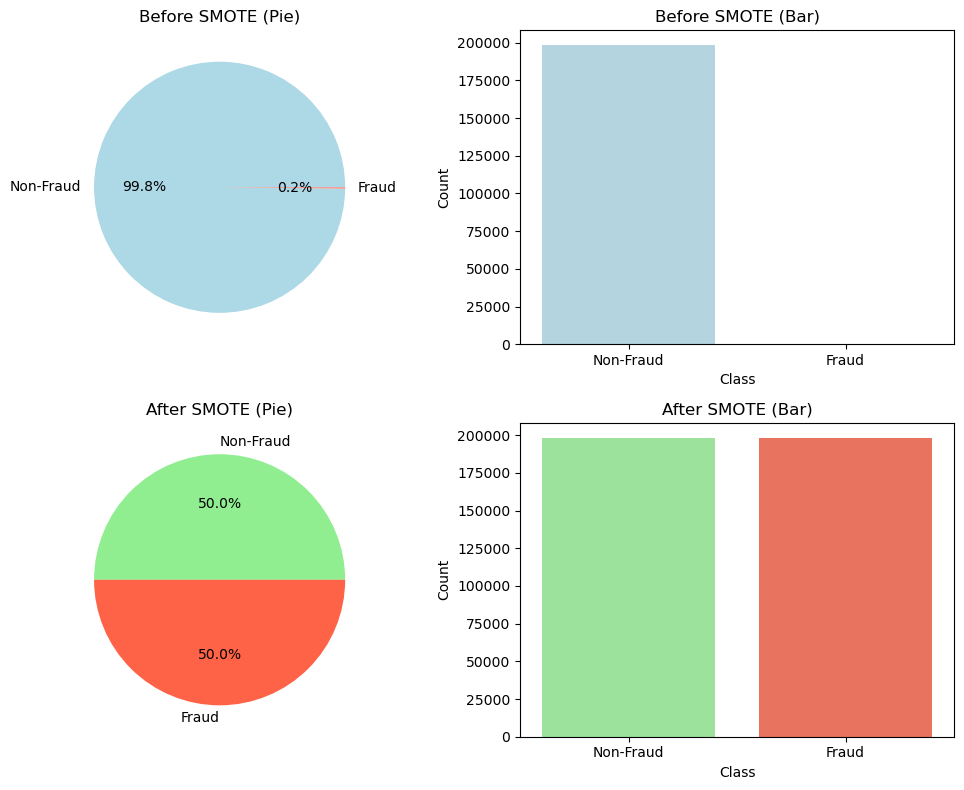

In [ ]:
# SMOTE directly on already scaled X_train
X_train_res, y_train_res = apply_smote(X_train_scaled, y_train)

X_train_res_scaled = X_train_res


In [100]:
#  Save preprocessed + resampled data for tuning notebook
import joblib

joblib.dump(
    (X_train_res_scaled, y_train_res, X_val_scaled, y_val, X_test_scaled, y_test),
    "artifacts/lstm_with_attention/data_for_tuning.pkl"
)

styled_print("📂 Saved processed data to artifacts/lstm_with_attention/data_for_tuning.pkl")

# **Step 4: Models**

## **Baseline Model – MLP**

### **1. Build Baseline MLP Model**

In [125]:
from models.mlp_baseline import build_baseline_mlp

# Build simple MLP baseline
mlp_model = build_baseline_mlp(input_shape=X_train_scaled.shape[1:])



### **2. Model Summary**

In [126]:

# Show model architecture
mlp_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

### **3. Train Baseline MLP Model**

In [128]:
from training.mlp_trainer import train_baseline_mlp

mlp_model, mlp_history = train_baseline_mlp(
    mlp_model,
    X_train_scaled,
    y_train,
    X_val_scaled,
    y_val,
    epochs=20,
    batch_size=512
)

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9989 - val_loss: 0.0048
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9989 - val_loss: 0.0047
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9989 - val_loss: 0.0045
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.9992 - loss: 0.0038 - 

### **4. Plot Loss Curve**

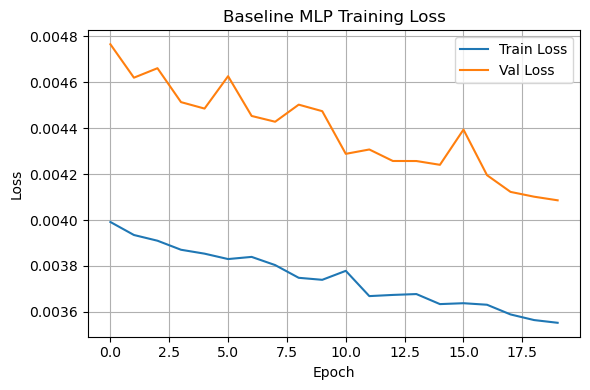

In [129]:
plot_loss_curve(mlp_history, title="Baseline MLP Training Loss")


### **5. Evaluate Baseline MLP on Test Set**

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


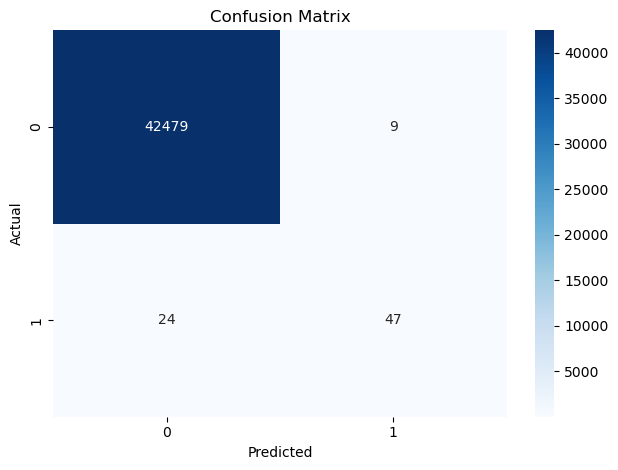

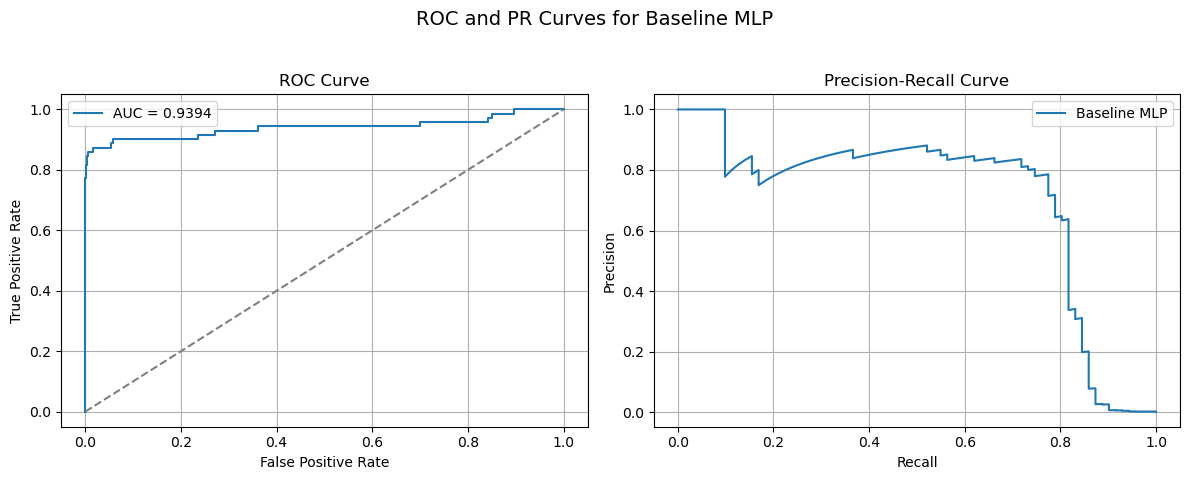

In [130]:
from training.mlp_trainer import evaluate_baseline_mlp

mlp_metrics = evaluate_baseline_mlp(mlp_model, X_test_scaled, y_test)


### **6. Predict on Test Set (Unseen Data)🔺 + Generate Classification Report + Compute Custom Metrics (Baseline MLP)**

In [ ]:
from sklearn.metrics import classification_report

# Print classification report
y_pred = (mlp_model.predict(X_test_scaled) > 0.5).astype("int32")
styled_print(" Classification Report for Baseline MLP:\n")
print(classification_report(y_test, y_pred, digits=4))


print('')
print('')


import pandas as pd
from evaluation.metrics import compute_classification_metrics

# ####################################### Predict on test set (unseen data) for MLP #######################################
#  Get predicted probabilities and binary predictions
y_scores = mlp_model.predict(X_test_scaled).ravel()
y_pred = (y_scores >= 0.5).astype(int)
##########################################################################################################################

# 📊 Compute metrics
mlp_summary = compute_classification_metrics(y_test, y_pred, y_scores)

# 📋 Create summary DataFrame
summary_df = pd.DataFrame([{
    "Precision": mlp_summary["precision"],
    "Recall": mlp_summary["recall"],
    "F1-Score": mlp_summary["f1_score"],
    "AUC-ROC": mlp_summary["auc_roc"],
    "PR-AUC": mlp_summary["pr_auc"],
}])

# 🖨️ Display the table
styled_print(" Evaluation Summary (Baseline MLP):")
display(summary_df)




1330/1330 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     42488
           1     0.8393    0.6620    0.7402        71

    accuracy                         0.9992     42559
   macro avg     0.9194    0.8309    0.8699     42559
weighted avg     0.9992    0.9992    0.9992     42559



1330/1330 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step


,Precision,Recall,F1-Score,AUC-ROC,PR-AUC
0,0.839286,0.661972,0.740157,0.939391,0.705941


## **Model 1 -  LSTM with Attention + SMOTE**

### **1. Train LSTM + Attention Model**

Epoch 1/50
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUC: 0.9822 - Precision: 0.9681 - Recall: 0.9018 - loss: 0.1649 - val_AUC: 0.9351 - val_Precision: 0.3816 - val_Recall: 0.8169 - val_loss: 0.0095 - learning_rate: 0.0010
Epoch 2/50
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9917 - Precision: 0.9641 - Recall: 0.9394 - loss: 0.1139 - val_AUC: 0.9596 - val_Precision: 0.1501 - val_Recall: 0.8732 - val_loss: 0.0217 - learning_rate: 0.0010
Epoch 3/50
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9933 - Precision: 0.9654 - Recall: 0.9476 - loss: 0.1024 - val_AUC: 0.9216 - val_Precision: 0.8689 - val_Recall: 0.7465 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 4/50
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9941 - Precision: 0.9667 - Recall: 0.9515 - loss: 0.0963 - val_AUC: 0.8019 - val_Precision: 0.0017 - val_Recall: 1.0000 - val_loss: 4.6979 - learning_rate: 0.0010
Epoch 5/50
1550/1550 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9948 - Precision: 0.9679 - Recall

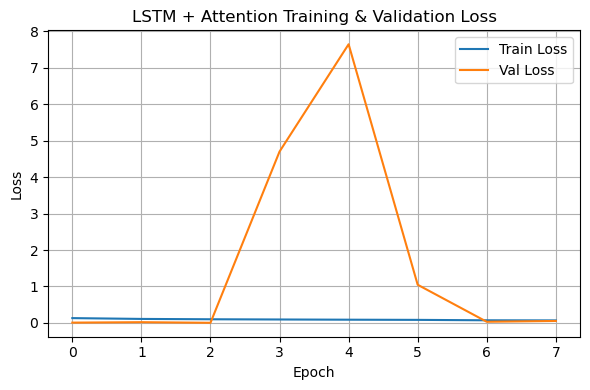

In [ ]:
# final_experiments.ipynb
from training.lstm_attention_trainer import train_lstm_model
import numpy as np
import os

# Reshape scaled + SMOTE-resampled data for LSTM (samples, timesteps, features)
X_train_seq = np.expand_dims(X_train_res_scaled.values, axis=1)
X_val_seq = np.expand_dims(X_val_scaled.values, axis=1)
X_test_seq = np.expand_dims(X_test_scaled.values, axis=1)

# Define input shape for LSTM
input_shape = (1, X_train_seq.shape[2])

# Train LSTM
model, history = train_lstm_model(
    X_train=X_train_seq,
    y_train=y_train_res,
    X_val=X_val_seq,
    y_val=y_val,
    input_shape=input_shape,
    epochs=50,
    batch_size=256
)


### **2. Predict on Validation Set + Save Pre-Tuning Metrics (LSTM + Attention)**

In [99]:
from evaluation.metrics import compute_classification_metrics
import pandas as pd
import os
from utils.style_utils import styled_print 

# Save Before Tuning Metrics on validation set (NOT test set)
y_val_probs = model.predict(X_val_seq)
y_val_preds = (y_val_probs >= 0.5).astype(int)

metrics_before = compute_classification_metrics(y_val, y_val_preds, y_val_probs)

df_before = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1", "AUC-ROC", "PR-AUC"],
    "Before Tuning": [
        metrics_before["precision"],
        metrics_before["recall"],
        metrics_before["f1_score"],
        metrics_before["auc_roc"],
        metrics_before["pr_auc"]
    ]
})

save_path = "artifacts/lstm_with_attention/before_tuning_metrics.csv"
os.makedirs(os.path.dirname(save_path), exist_ok=True)
df_before.to_csv(save_path, index=False)

styled_print(f"📁 Before tuning metrics saved to: {save_path}")

1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step


### **3. Model Summary**

In [97]:
import os
from tensorflow.keras.utils import plot_model
from utils.style_utils import styled_print  # if you're using styled_print for feedback

summary_dir = "artifacts/lstm_with_attention" # Create folder if it doesn't exist
os.makedirs(summary_dir, exist_ok=True)

model.summary() # 1. Print architecture in notebook

summary_path = os.path.join(summary_dir, "lstm_attention_summary.txt") # 2. Save architecture to TXT file


try:
    with open(summary_path, "w") as f:
        model.summary(print_fn=lambda line: f.write(line + "\n"))
    styled_print(f"📁 Saved model summary to: {summary_path}")
except Exception as e:
    print(f"❌ Failed to save model summary: {e}")

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 1, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 1, 64)          │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_6               │ (None, 64)             │            65 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,654 (483.03 KB)

 Trainable params: 61,762 (241.26 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 61,764 (241.27 KB)

### **4. LSTM with attention Hyperparameter Tuning**

#### **1. Hyperparameter Tuning Reference**

> ❗️ The full Detailed hyperparameter tuning process and explanation for the LSTM + Attention model was conducted in the separate notebook: [`tuning/lstm_attention_tuning.ipynb`](./tuning/lstm_attention_tuning.ipynb)

<br> 

We decided to isolate the tuning code in a dedicated notebook for the following reasons:

-  **Clarity & Clean Structure**: Keeps this master notebook focused on final results and avoids cluttering it with experimental trial loops.
-  **Reusability**: Tuning logic is centralized and reusable if we want to apply it again later.
-  **Experimentation Environment**: The tuning notebook allows for exploratory work without affecting the clean pipeline here.
-  **Outputs Shared via Artifacts**: Key outputs such as tuning trials and best parameters are saved and loaded back into this notebook from disk.

<br> 

 You can view the full tuning trials and Optuna setup here:  
📌[`tuning/lstm_attention_tuning.ipynb`](./tuning/lstm_attention_tuning.ipynb)


#### **2. Load and Display Best hyperparameters**

We :
- retrieve the best hyperparameters from the Optuna `study`.
- convert the dictionary of best parameters into a pandas DataFrame.
- transpose and reset the index to organize it in a readable format.
- rename the columns to `"Parameter"` and `"Value"` for clarity.
- save the best parameters to `tuning_results/lstm_with_attention_best_params.csv`.
- display the DataFrame in the notebook for visual confirmation.
- print a styled message to confirm that the hyperparameters were successfully saved.


In [ ]:
import pandas as pd
from utils.style_utils import styled_print

#  Load the best hyperparameters from the saved CSV
best_params_df = pd.read_csv("tuning/tuning_results/lstm_with_attention_best_params.csv")

#  Show message and display
styled_print("🏆 Best hyperparameters (lstm_with_attention)")
display(best_params_df)

print('')
styled_print("🗂️ Best hyperparameters loaded from: tuning_results/lstm_with_attention_best_params.csv")

# Optional: Convert to dict if you want to re-train model using them
best_params = best_params_df.to_dict(orient="records")[0]  # {'lstm_units': 64, ...}


,lstm_units,dense_units,dropout_rate,learning_rate,optimizer
0,64,128,0.3,0.001,rmsprop


### **5. Final Training & Loss Curve**


- **Final Model Training:** Final training using best hyperparameters was conducted in [`tuning/lstm_attention_tuning.ipynb`](./tuning/lstm_attention_tuning.ipynb) using the full training data and validation split.

- **Loss Curve Visualization:** Below, we visualize the loss curve after final training to assess convergence behavior and potential overfitting. 



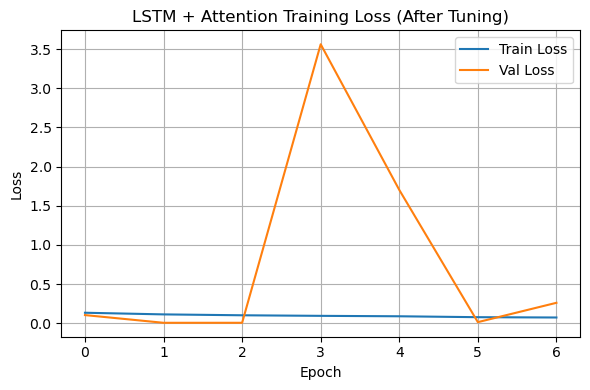

In [113]:
import joblib
from types import SimpleNamespace
from evaluation.plots import plot_loss_curve

# 🗂️ Load history dictionary
history_dict = joblib.load("tuning/tuning_results/lstm_with_attention_best_history_after_tuning.pkl")

#  Wrap it into a dummy object that mimics `History`
class HistoryWrapper:
    def __init__(self, history):
        self.history = history

#  Create fake Keras History object
wrapped_history = HistoryWrapper(history_dict)

#  Plot final training loss curve
plot_loss_curve(wrapped_history, title="LSTM + Attention Training Loss (After Tuning)")


### **6. Predict on Test Set (Unseen Test Data)🔺 + Evaluate with Custom Metrics (LSTM + Attention)**

In [ ]:
from tensorflow.keras.models import load_model
from models.lstm_attention_model import AttentionLayer  # Import our custom Attention layer
from evaluation.metrics import evaluate_lstm_predictions


# Load the model with custom layer
best_model = load_model(
    "tuning/tuning_results/lstm_with_attention_best_model_after_tuning.h5",
    custom_objects={"AttentionLayer": AttentionLayer}
)


# ####################################### Predict on test set (unseen data) for LSTM with attention #######################################
#  Get Predictions
y_pred_prob = best_model.predict(X_test_seq).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)
###########################################################################################################################################


# Evaluate
metrics = evaluate_lstm_predictions(y_test, y_pred, y_pred_prob)

# Print results
from utils.style_utils import styled_print
styled_print(" Final Evaluation on Test Set (LSTM + Attention)")
print(metrics["report"])


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step


              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     42488
           1     0.8500    0.7183    0.7786        71

    accuracy                         0.9993     42559
   macro avg     0.9248    0.8590    0.8891     42559
weighted avg     0.9993    0.9993    0.9993     42559



### **7. Plot the Visual Evaluation of Final LSTM + Attention Model (After Tuning)**

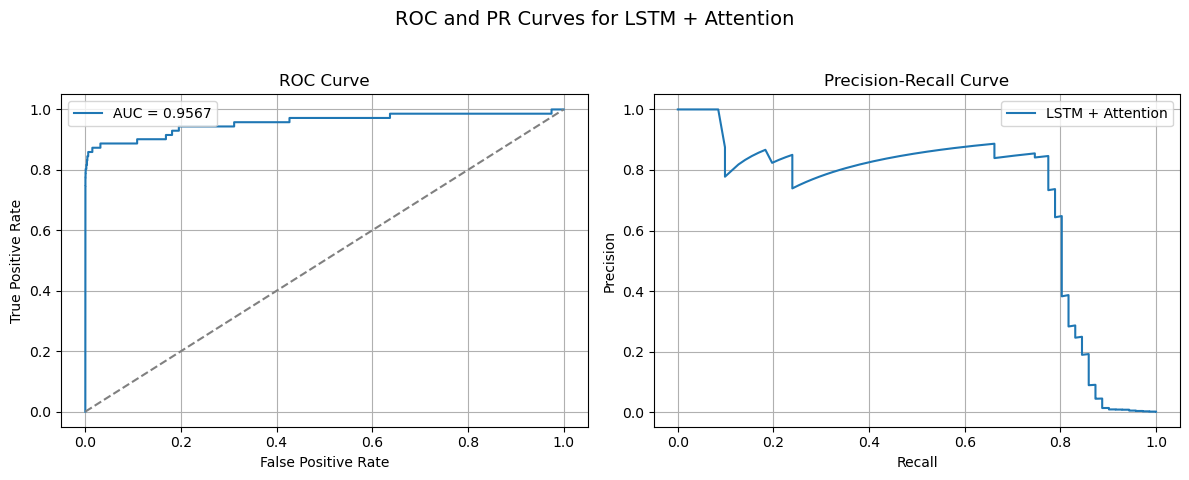

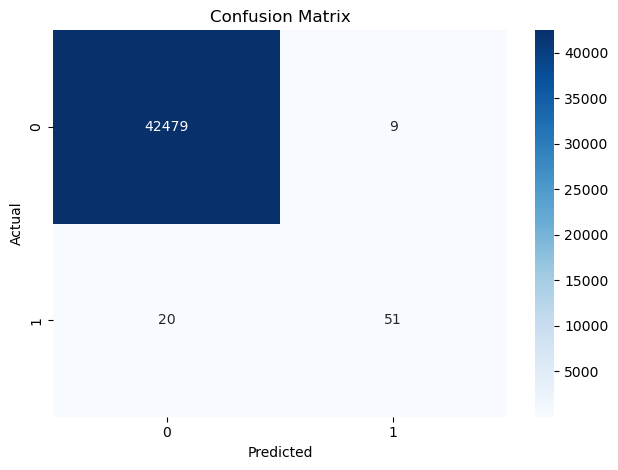

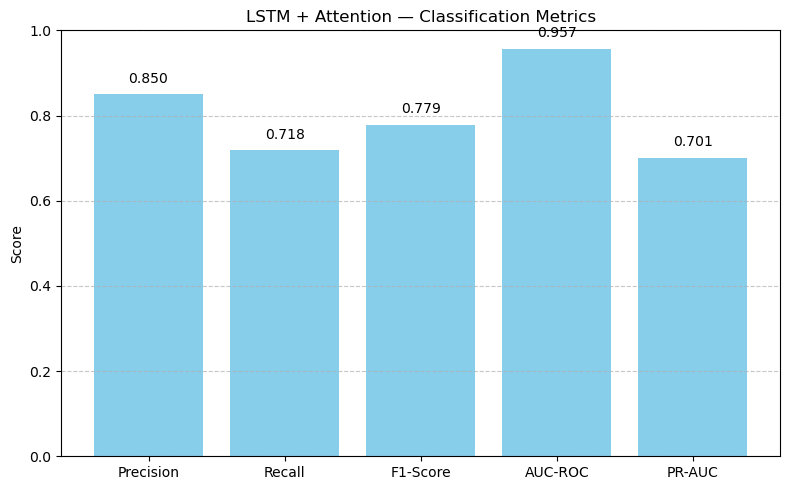

In [121]:
#  Visual Evaluation of Final LSTM + Attention Model (After Tuning)

from evaluation.plots import (
    plot_roc_and_pr_curves,
    plot_confusion_matrix,
    plot_metric_bars
)

from utils.style_utils import styled_print

#  Plot ROC and PR Curves
plot_roc_and_pr_curves(
    y_true=y_test,
    y_scores=y_pred_prob,
    model_name="LSTM + Attention"
)

#  Plot Confusion Matrix
plot_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred
)

#  Plot Metric Bar Chart (Precision, Recall, F1, AUC, PR-AUC)
plot_metric_bars(
    metrics_dict=metrics,
    model_name="LSTM + Attention"
)

styled_print("✅ Visual Evaluation Completed for LSTM + Attention (ROC, PR, Confusion, Bar Metrics)")


### **8. Save Final Metrics**

In [123]:
import pandas as pd

#  Create table with key metrics 
comparison_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "AUC-ROC", "PR-AUC"],
    "After Tuning": [
        metrics["precision"],
        metrics["recall"],
        metrics["f1_score"],
        metrics["auc_roc"],
        metrics["pr_auc"]
    ]
})

#  Save to CSV (used for Section 4 of the report)
comparison_df.to_csv("artifacts/lstm_with_attention/after_tuning_metrics.csv", index=False)

#  Confirmation
from utils.style_utils import styled_print
styled_print("📈 After-tuning metrics saved to: artifacts/lstm_with_attention/after_tuning_metrics.csv")
display(comparison_df)


,Metric,After Tuning
0,Precision,0.850000
1,Recall,0.718310
2,F1-Score,0.778626
3,AUC-ROC,0.956708
4,PR-AUC,0.701344


## **Model 2 - Tabnet**

### **1. Save the original scaled non-SMOTE data**

In [11]:
import joblib
import os

# Ensure artifacts/tabnet exists
os.makedirs("artifacts/tabnet", exist_ok=True)

# Save the original scaled, non-SMOTE data
joblib.dump(
    (X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test),
    "artifacts/tabnet/data_scaled_nosmote_for_tabnet.pkl"
)

styled_print("📂 Saved non-SMOTE data for TabNet at: artifacts/tabnet/data_scaled_nosmote_for_tabnet.pkl")


### **2. Build and Train Tabnet Model**

In [ ]:
from models.tabnet_model import build_tabnet_model
from training.tabnet_trainer import train_tabnet_model

# Build the model
tabnet_model = build_tabnet_model()


# Train and return training history
history = train_tabnet_model(
    model=tabnet_model,
    X_train=X_train_scaled,
    y_train=y_train,
    X_val=X_val_scaled,
    y_val=y_val,
    output_dir="artifacts/tabnet/tabnet"  # we Add file to tabnet (no .zip)
)



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_f1_score = 0.79104
Successfully saved model at artifacts/tabnet/tabnet.zip


 No validation loss key found in logs. Only training loss will be plotted.


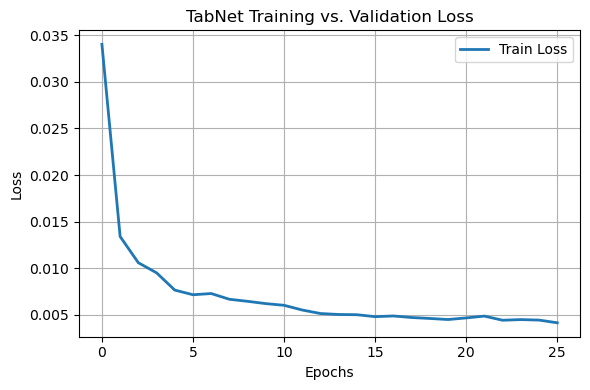

In [9]:
# Plot TabNet Training Loss
from evaluation.plots import plot_tabnet_loss

plot_tabnet_loss(history.history, title="TabNet Training vs. Validation Loss")


### **3. Model Summary**

In [18]:
#  1. Save Model Architecture Summary verbose
with open("artifacts/tabnet/tabnet_architecture_verbose.txt", "w") as f:
    f.write("TabNet Configuration\n")
    f.write(str(tabnet_model.network))
    f.write("\n\nBest training F1-Score: {:.5f}".format(max(history['val_f1_score'])))
    f.write("\nEarly Stopping: epoch {} of {}".format(len(history['val_f1_score']), len(history['loss'])))

styled_print("📁 TabNet architecture summary verbose saved at: artifacts/tabnet/tabnet_architecture_verbose.txt")

In [17]:
#  2. Save Model Summary 

import os
from utils.style_utils import styled_print  

summary_dir = "artifacts/tabnet"
os.makedirs(summary_dir, exist_ok=True)

summary_path = os.path.join(summary_dir, "tabnet_summary.txt")

try:
    with open(summary_path, "w") as f:
        f.write("📌 TabNet Model Summary\n")
        f.write("======================\n\n")
        f.write(f"Input Dimension: {tabnet_model.input_dim}\n")
        f.write(f"Output Dimension: {tabnet_model.output_dim}\n")
        f.write(f"Decision Steps: {tabnet_model.n_steps}\n")
        f.write(f"Feature Transformer dim: {tabnet_model.n_d}\n")
        f.write(f"Attentive Transformer dim: {tabnet_model.n_a}\n")
        f.write(f"Gamma: {tabnet_model.gamma}\n")
        f.write(f"Sparsity Loss Weight: {tabnet_model.lambda_sparse}\n")
        f.write(f"Mask Type: {tabnet_model.mask_type}\n")
    styled_print(f" 📁 TabNet summary saved at: {summary_path}")
except Exception as e:
    print(f"❌ Failed to save TabNet summary: {e}")



print("-------------- TabNet Model Summary -------------")
print("=================================================")
print(f"Input Dimension        : {tabnet_model.input_dim}")
print(f"Output Dimension       : {tabnet_model.output_dim}")
print(f"Decision Steps         : {tabnet_model.n_steps}")
print(f"Feature Transformer dim: {tabnet_model.n_d}")
print(f"Attentive Transformer dim: {tabnet_model.n_a}")
print(f"Gamma (feature reuse)  : {tabnet_model.gamma}")
print(f"Sparsity Loss Weight   : {tabnet_model.lambda_sparse}")
print(f"Mask Type              : {tabnet_model.mask_type}")


-------------- TabNet Model Summary -------------
Input Dimension        : 30
Output Dimension       : 2
Decision Steps         : 5
Feature Transformer dim: 32
Attentive Transformer dim: 32
Gamma (feature reuse)  : 1.5
Sparsity Loss Weight   : 0.001
Mask Type              : entmax


### **4. Tabnet Hyperparameter Tuning**

#### **1. Hyperparameter Tuning Reference**

> ❗️ The full Detailed hyperparameter tuning process and explanation for the Tabnet model was conducted in the separate notebook: [`tuning/tabnet_tuning.ipynb`](./tuning/tabnet_tuning.ipynb)

<br> 

We decided to isolate the tuning code in a dedicated notebook for the following reasons:

-  **Clarity & Clean Structure**: Keeps this master notebook focused on final results and avoids cluttering it with experimental trial loops.
-  **Reusability**: Tuning logic is centralized and reusable if we want to apply it again later.
-  **Experimentation Environment**: The tuning notebook allows for exploratory work without affecting the clean pipeline here.
-  **Outputs Shared via Artifacts**: Key outputs such as tuning trials and best parameters are saved and loaded back into this notebook from disk.

<br> 

 You can view the full tuning trials and Optuna setup here:  
📌[`tuning/tabnet_tuning.ipynb`](./tuning/tabnet_tuning.ipynb)


#### **2. Load and Display Best hyperparameters**

- We Loaded best hyperparameters from the Optuna tuning phase.
- File location: `tuning/tuning_results/tabnet_best_params.csv`.
- These hyperparameters yielded the highest validation F1-score.
- They will be used to rebuild and evaluate the final TabNet model on the test set.
- Displayed below as a one-row table for clarity and reproducibility.


In [25]:
import pandas as pd
from IPython.display import display

# Load best hyperparameters from tuning_results
best_params_path = "tuning/tuning_results/tabnet_best_params.csv"
styled_print("🗂️ Best hyperparameters loaded from: tuning_results/lstm_with_attention_best_params.csv")

best_params_df = pd.read_csv(best_params_path)

# ✅ Show best hyperparameters in one-row table
styled_print(" 🏆 Best hyperparameters from tuning (Tabnet)")
display(best_params_df)


,n_d,n_a,n_steps,gamma,lambda_sparse,lr
0,8,32,3,2.0,0.005222,0.000325


### **5. Predict on Test Set (Unseen Test Data)🔺 + Generate Classification Report (TabNet)**

In [ ]:
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import joblib
import numpy as np
from utils.style_utils import styled_print

#  Load the saved TabNet model
tabnet_best_model = TabNetClassifier()
tabnet_best_model.load_model("tuning/tuning_results/tabnet_best_model_after_tuning.zip")

#  Load saved test data
data_path = "artifacts/tabnet/data_scaled_nosmote_for_tabnet.pkl"
_, _, _, _, X_test_scaled, y_test = joblib.load(data_path)

#  Ensure the data is passed as NumPy arrays
X_test_np = np.array(X_test_scaled)

# ####################################### Predict on test set (unseen data) for TabNet # #######################################
#  Predictions
y_pred_tabnet = tabnet_best_model.predict(X_test_np)
y_pred_prob_tabnet = tabnet_best_model.predict_proba(X_test_np)[:, 1]
###############################################################################################################################

# 📄 Generate classification report
report_str = classification_report(y_test, y_pred_tabnet, digits=4)
styled_print(" Final Evaluation on Test Set (TabNet)")
print(report_str)


              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     42488
           1     0.8154    0.7465    0.7794        71

    accuracy                         0.9993     42559
   macro avg     0.9075    0.8731    0.8895     42559
weighted avg     0.9993    0.9993    0.9993     42559



### **6. Plot the Visual Evaluation of Final Tabnet Model (After Tuning)**

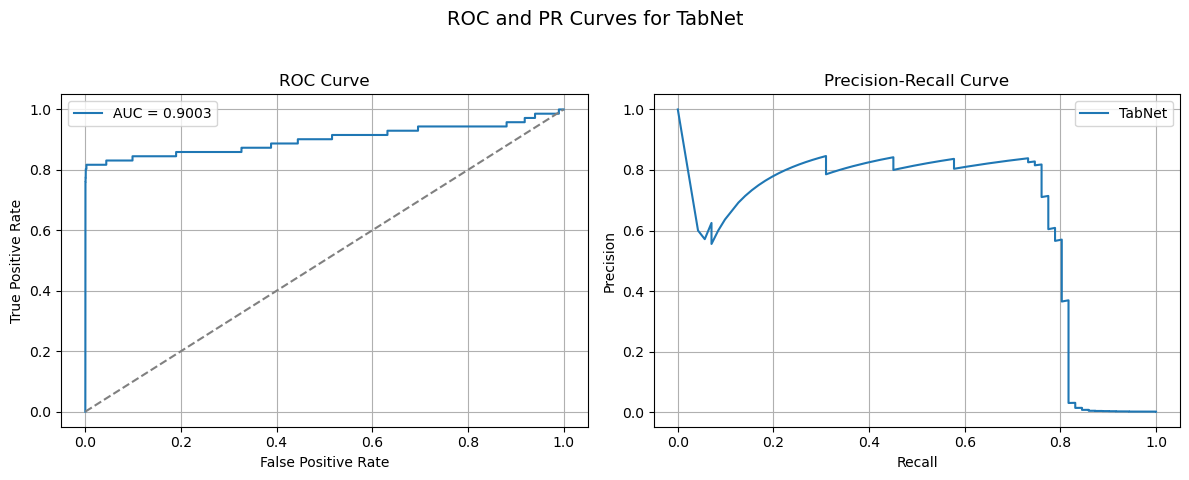

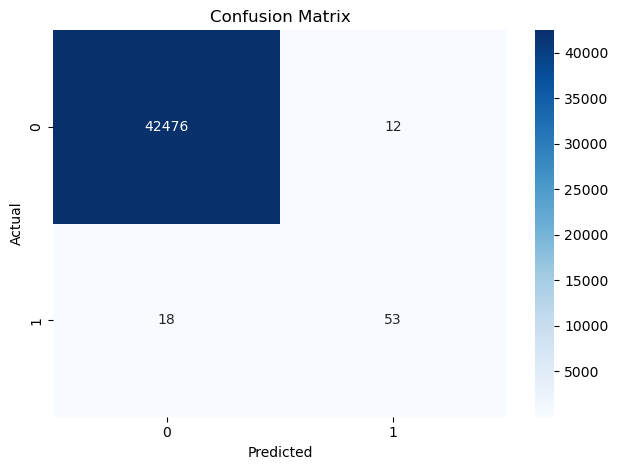

In [49]:
#  Plot the Visual Evaluation of Final TabNet (After Tuning)

from evaluation.plots import (
    plot_roc_and_pr_curves,
    plot_confusion_matrix,
    plot_metric_bars,
)
from utils.style_utils import styled_print

# 1. ROC and PR Curves
plot_roc_and_pr_curves(
    y_true=y_test,
    y_scores=y_pred_prob_tabnet,
    model_name="TabNet"
)

# 2. Confusion Matrix
plot_confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_tabnet
)



styled_print("✅ Visual Evaluation Completed for TabNet (ROC, PR, Confusion)")


### **7. Save Final Metrics**

In [51]:
import pandas as pd
from utils.style_utils import styled_print

#  Create table with key TabNet metrics
comparison_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "AUC-ROC", "PR-AUC"],
    "After Tuning": [
        metrics_tabnet["report"]["1"]["precision"],
        metrics_tabnet["report"]["1"]["recall"],
        metrics_tabnet["report"]["1"]["f1-score"],
        metrics_tabnet["roc_auc"],
        metrics_tabnet["pr_auc"]
    ]
})

# 💾 Save to CSV (used for Section 4 of the report)
comparison_df.to_csv("artifacts/tabnet/after_tuning_metrics.csv", index=False)

# ✅ Confirmation
styled_print("📊 After-tuning metrics saved to: artifacts/tabnet/after_tuning_metrics.csv")
display(comparison_df)


,Metric,After Tuning
0,Precision,0.815385
1,Recall,0.746479
2,F1-Score,0.779412
3,AUC-ROC,0.900316
4,PR-AUC,0.627636


## **Model 3 - Autoencoder (AE)**


### **1. Load Final Autoencoder Model (.h5)**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError


ae_model = load_model(
    "tuning/tuning_results/ae_best_model_after_tuning.h5",
    custom_objects={"mse": MeanSquaredError()}
)

### **2. Display Model Summary**

In [78]:
# Print architecture summary
ae_model.summary()


Model: "AE_dropout0.2_enc32_noise0.05"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_45               │ (None, 30)             │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_182 (Dense)               │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_137         │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_183 (Dense)               │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,560 (10.00 KB)

 Trainable params: 2,430 (9.49 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2 (12.00 B)

### **3. Predict on Test set (Unseen Test Data)🔺 for Autoencoder**

In [ ]:
from training.autoencoder_trainer import evaluate_autoencoder
from preprocessing.data_loader import load_data, preprocess_data, split_data, scale_data

# Load and preprocess the data again (in case not done yet in notebook)
df = preprocess_data(load_data())
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)
X_train_scaled, X_val_scaled, X_test_scaled, scaler = scale_data(X_train, X_val, X_test)



# ####################################### Predict on test set (unseen data) for Autoencoder (AE) #######################################
#  Get predictions
reconstructions = ae_model.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)
#########################################################################################################################################

# Determine threshold (95th percentile of MSE) ===
threshold = np.percentile(reconstruction_errors, 95)

# Predict fraud vs. genuine
y_pred = (reconstruction_errors > threshold).astype(int)

### **4. Evaluate AE Predictions on Test Set**

[1] Original shape: (284807, 31)
[2] After removing duplicates: (283726, 31)
[3] After dropping missing values: (283726, 31)
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step


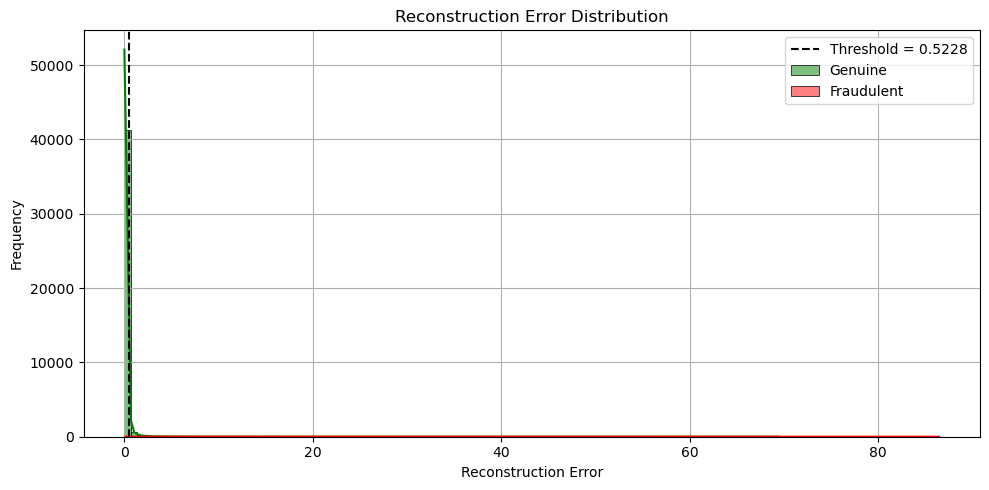

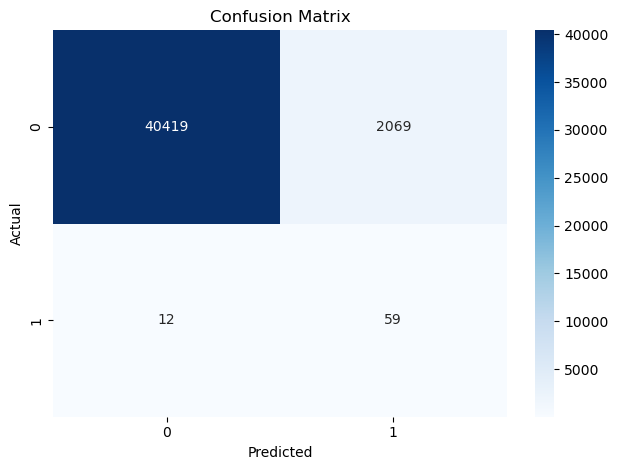

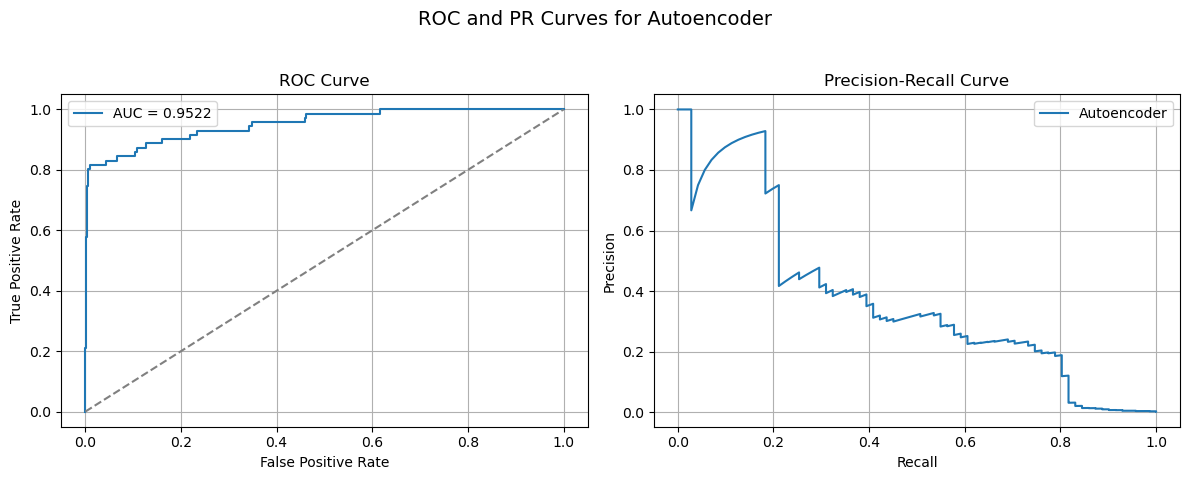

In [ ]:
# Run evaluation on test set with visuals enabled
ae_metrics, ae_threshold = evaluate_autoencoder(
    model=ae_model,
    X_data=X_test_scaled,
    y_data=y_test,
    threshold=None,  # will auto use 95th percentile
    visualize=True   # will plot ROC, PR, Confusion, Histogram
)


### **5. Show Classification Report**

In [80]:
from utils.style_utils import styled_print

styled_print("📊 Classification Report (Autoencoder):")
print(ae_metrics["report"])


              precision    recall  f1-score   support

           0     0.9997    0.9513    0.9749     42488
           1     0.0277    0.8310    0.0537        71

    accuracy                         0.9511     42559
   macro avg     0.5137    0.8911    0.5143     42559
weighted avg     0.9981    0.9511    0.9734     42559



### **6. Save Report + Metrics to Disk**

In [82]:
import pandas as pd
import os

# Save report
os.makedirs("artifacts/autoencoder", exist_ok=True)

# Save classification report
with open("artifacts/autoencoder/classification_report.txt", "w") as f:
    f.write(ae_metrics["report"])

# Save summary metrics as CSV
summary_df = pd.DataFrame({k: [v] for k, v in ae_metrics.items() if k != "report"})
summary_df.to_csv("artifacts/autoencoder/evaluation_summary.csv", index=False)

styled_print(" AE Evaluation saved to:")
print("classification_report.txt")
print("evaluation_summary.csv")


classification_report.txt
evaluation_summary.csv


# **Step 5: Ensemble Model**

### **1. 🔹 Majority Voting (Hard Voting)**


/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


   1/1330 ━━━━━━━━━━━━━━━━━━━━ 3:07 141ms/step

/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step


/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step


              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     42488
           1     0.8448    0.6901    0.7597        71

    accuracy                         0.9993     42559
   macro avg     0.9222    0.8450    0.8797     42559
weighted avg     0.9992    0.9993    0.9992     42559

AUC-ROC: 0.8983
PR-AUC:  0.7232


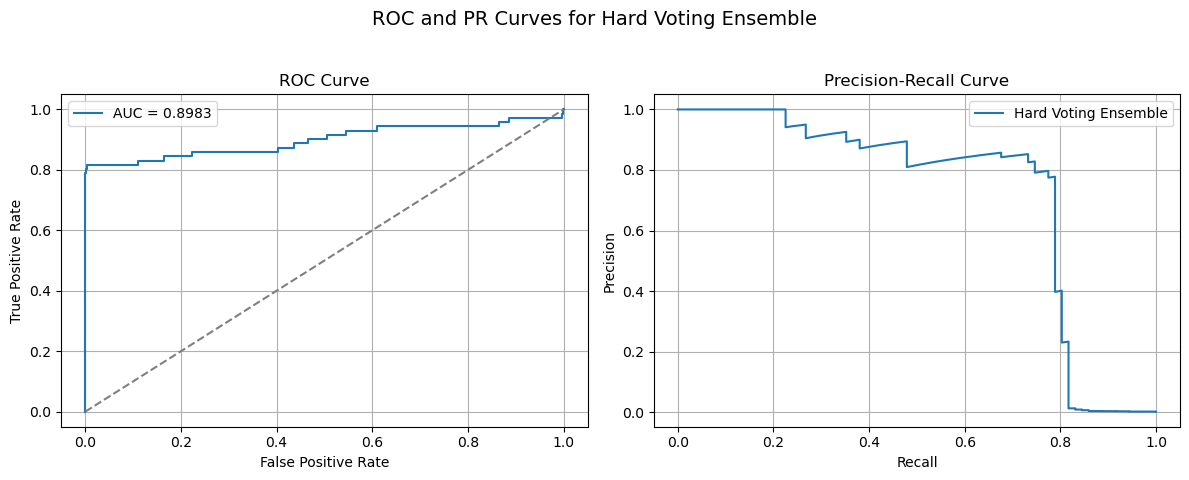

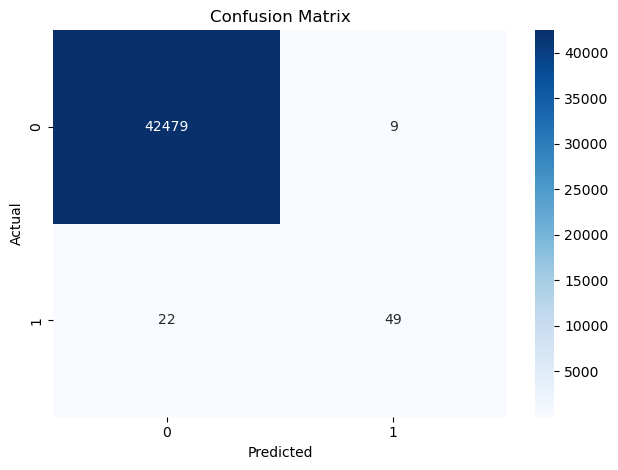

In [8]:
# === Imports ===
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from tensorflow.keras.models import load_model
from models.lstm_attention_model import AttentionLayer
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import MinMaxScaler
from models.ensemble_model.ensemble_logic import majority_vote
from evaluation.plots import plot_roc_and_pr_curves, plot_confusion_matrix
from utils.style_utils import styled_print

# === Load LSTM model + predictions ===
X_test_seq = np.expand_dims(X_test_scaled.values, axis=1)
lstm_model = load_model("tuning/tuning_results/lstm_with_attention_best_model_after_tuning.h5",
                        custom_objects={"AttentionLayer": AttentionLayer})
y_prob_lstm = lstm_model.predict(X_test_seq).flatten()
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)

# === Load TabNet model + predictions ===
tabnet_model = TabNetClassifier()
tabnet_model.load_model("tuning/tuning_results/tabnet_best_model_after_tuning.zip")
X_test_np = X_test_scaled.values
y_pred_tabnet = tabnet_model.predict(X_test_np)
y_prob_tabnet = tabnet_model.predict_proba(X_test_np)[:, 1]

# === Load Autoencoder + MSE score ===
ae_model = load_model("tuning/tuning_results/ae_best_model_after_tuning.h5", compile=False)
reconstructions = ae_model.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)
mse_array = mse.values.reshape(-1, 1)  # ✅ Convert Series → NumPy → reshape

threshold = np.percentile(mse, 95)
y_pred_ae = (mse > threshold).astype(int)

# === Hard Voting Ensemble ===
ensemble_preds = majority_vote([y_pred_lstm, y_pred_tabnet, y_pred_ae])
styled_print("📊 Classification Report – Hard Voting:")
print(classification_report(y_test, ensemble_preds, digits=4))

# === AUC & PR-AUC using average probabilities ===
mse_array = mse.values.reshape(-1, 1)  # 🔁 Fix Series reshape issue
normalized_ae_prob = MinMaxScaler().fit_transform(mse_array).flatten()
avg_prob = (y_prob_lstm + y_prob_tabnet + normalized_ae_prob) / 3
auc_roc = roc_auc_score(y_test, avg_prob)
pr_auc = average_precision_score(y_test, avg_prob)
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"PR-AUC:  {pr_auc:.4f}")

# === Visualizations ===
plot_roc_and_pr_curves(y_test, avg_prob, model_name="Hard Voting Ensemble")
plot_confusion_matrix(y_test, ensemble_preds)


### **2. 🔹 Soft Voting (Averaged Probabilities)**

/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step


/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


1330/1330 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step


              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     42488
           1     0.8525    0.7324    0.7879        71

    accuracy                         0.9993     42559
   macro avg     0.9260    0.8661    0.8938     42559
weighted avg     0.9993    0.9993    0.9993     42559

AUC-ROC: 0.8983
PR-AUC:  0.7232


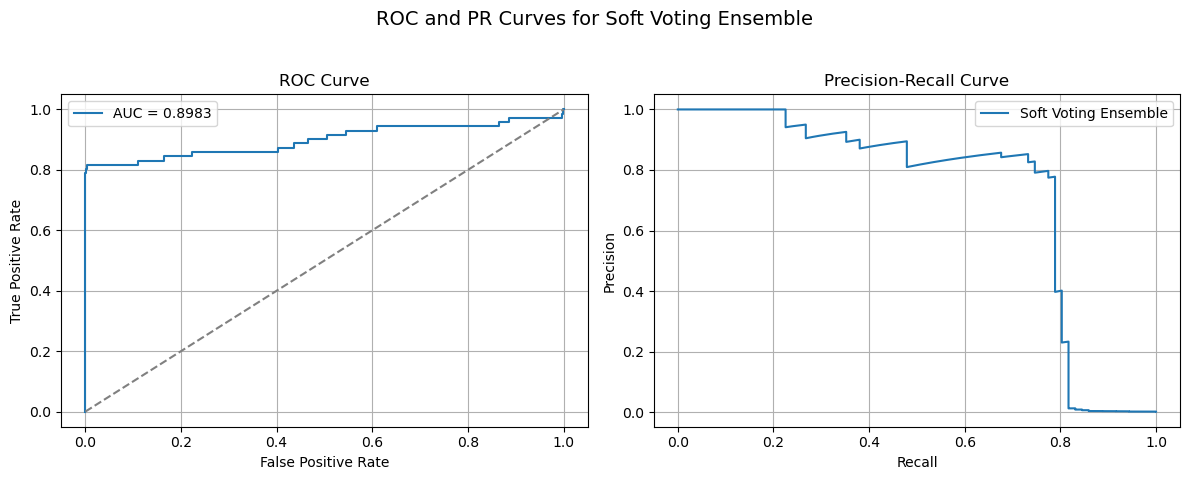

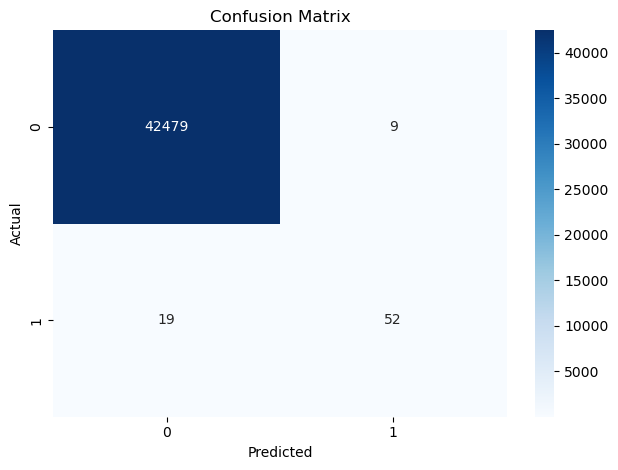

In [11]:
# === Imports ===
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from models.lstm_attention_model import AttentionLayer
from pytorch_tabnet.tab_model import TabNetClassifier
from evaluation.plots import plot_roc_and_pr_curves, plot_confusion_matrix
from utils.style_utils import styled_print

# === LSTM + Attention: Load model and predict probabilities ===
X_test_seq = np.expand_dims(X_test_scaled.values, axis=1)
lstm_model = load_model(
    "tuning/tuning_results/lstm_with_attention_best_model_after_tuning.h5",
    custom_objects={"AttentionLayer": AttentionLayer}
)
y_prob_lstm = lstm_model.predict(X_test_seq).flatten()

# === TabNet: Load model and predict probabilities ===
tabnet_model = TabNetClassifier()
tabnet_model.load_model("tuning/tuning_results/tabnet_best_model_after_tuning.zip")
X_test_np = X_test_scaled.values
y_prob_tabnet = tabnet_model.predict_proba(X_test_np)[:, 1]

# === Autoencoder: Predict reconstruction error and normalize to prob ===
ae_model = load_model("tuning/tuning_results/ae_best_model_after_tuning.h5", compile=False)
reconstructions = ae_model.predict(X_test_scaled)
mse = np.mean(np.power(X_test_scaled - reconstructions, 2), axis=1)
mse_array = np.array(mse).reshape(-1, 1)  # 🔧 Fix reshape on numpy array
y_prob_ae = MinMaxScaler().fit_transform(mse_array).flatten()

# === Soft Voting (average of probabilities) ===
soft_vote_probs = (y_prob_lstm + y_prob_tabnet + y_prob_ae) / 3
y_pred_soft = (soft_vote_probs > 0.5).astype(int)

# === Classification Report ===
styled_print("📊 Classification Report – Soft Voting:")
print(classification_report(y_test, y_pred_soft, digits=4))

# === AUC & PR-AUC Scores ===
auc_roc = roc_auc_score(y_test, soft_vote_probs)
pr_auc = average_precision_score(y_test, soft_vote_probs)
print(f"AUC-ROC: {auc_roc:.4f}")
print(f"PR-AUC:  {pr_auc:.4f}")

# === ROC & PR Curve Visualizations ===
plot_roc_and_pr_curves(y_test, soft_vote_probs, model_name="Soft Voting Ensemble")
plot_confusion_matrix(y_test, y_pred_soft)


### **3.🔹 Weighted Soft Voting**



              precision    recall  f1-score   support

           0     0.9995    0.9997    0.9996     42488
           1     0.8226    0.7183    0.7669        71

    accuracy                         0.9993     42559
   macro avg     0.9111    0.8590    0.8833     42559
weighted avg     0.9992    0.9993    0.9992     42559

AUC-ROC: 0.8973
PR-AUC:  0.7159


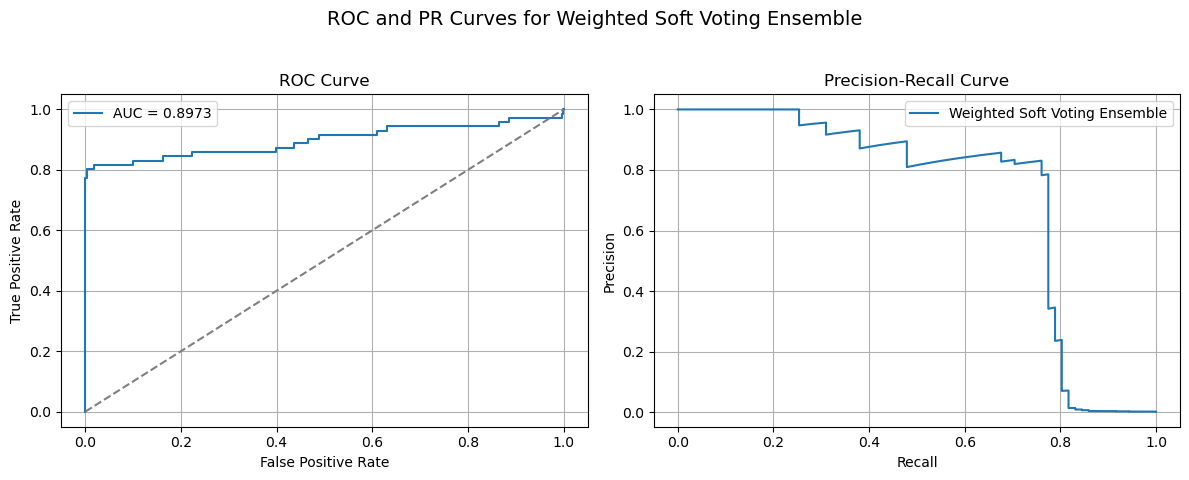

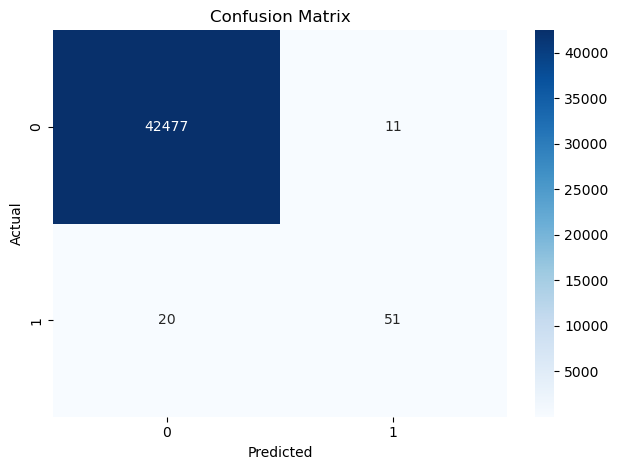

In [12]:
# === Weighted Ensemble Configuration ===
w_lstm = 0.45
w_tabnet = 0.15
w_ae = 0.40

# === Compute weighted average probabilities ===
ensemble_prob = (w_lstm * y_prob_lstm) + (w_tabnet * y_prob_tabnet) + (w_ae * y_prob_ae)
ensemble_pred = (ensemble_prob > 0.5).astype(int)

# === Evaluation ===
styled_print("📊 Classification Report – Weighted Soft Voting:")
print(classification_report(y_test, ensemble_pred, digits=4))

# === AUC & PR-AUC ===
auc_roc_weighted = roc_auc_score(y_test, ensemble_prob)
pr_auc_weighted = average_precision_score(y_test, ensemble_prob)
print(f"AUC-ROC: {auc_roc_weighted:.4f}")
print(f"PR-AUC:  {pr_auc_weighted:.4f}")

# === Visualizations ===
plot_roc_and_pr_curves(y_test, ensemble_prob, model_name="Weighted Soft Voting Ensemble")
plot_confusion_matrix(y_test, ensemble_pred)


# **Step 6: Comparison Table**

### **1. Final Model Performance Comparison (Baseline vs. Advanced Models)**

This table compares the performance of four models—Baseline MLP, LSTM + Attention, TabNet, and Autoencoder—on the credit card fraud detection task. Key insights include:

- The Baseline MLP model performs strongly on the Genuine class, but shows limited recall (66.2%) and F1-Score (74.0%) for the Fraudulent class, revealing difficulty in detecting fraud.
- The LSTM + Attention and TabNet models significantly improve fraud detection, achieving Fraud F1-Scores of 77.9% and 77.8%, respectively, while maintaining near-perfect Genuine class metrics.
- The Autoencoder, despite a strong Genuine Precision, struggles heavily with precision for the Fraudulent class (2.77%), reflecting its unsupervised nature.
- Among the ensemble methods, the Soft Voting Ensemble achieves the best balance, reaching the highest Fraud Precision (85.3%) and Fraud F1-Score (78.8%). This makes it the most effective model for identifying fraud cases while preserving high accuracy for genuine transactions.

In [53]:
import pandas as pd
from IPython.display import display

# Optional styled print
try:
    from utils.style_utils import styled_print
except ImportError:
    def styled_print(msg): print(msg)

# Build the final comparison table
model_comparison_df = pd.DataFrame({
    "Model": [
        "Baseline MLP",
        "LSTM + Attention",
        "TabNet",
        "Autoencoder",
        "Ensemble (Hard Voting Ensemble)",
        "Ensemble (Soft Voting Ensemble)",
        "Ensemble (Weighted Soft Voting)"
    ],
    "Genuine Precision": [0.9994, 0.9995, 0.9996, 0.9997, 0.9995, 0.9996, 0.9995],
    "Genuine Recall":    [0.9998, 0.9998, 0.9997, 0.9513, 0.9998, 0.9998, 0.9997],
    "Genuine F1-Score":  [0.9996, 0.9997, 0.9996, 0.9749, 0.9996, 0.9997, 0.9996],
    "Fraud Precision":   [0.8393, 0.8500, 0.8154, 0.0277, 0.8448, 0.8525, 0.8226],
    "Fraud Recall":      [0.6620, 0.7183, 0.7465, 0.8310, 0.6901, 0.7324, 0.7183],
    "Fraud F1-Score":    [0.7402, 0.7786, 0.7794, 0.0537, 0.7597, 0.7879, 0.7669]
})

# Save it
model_comparison_df.to_csv("artifacts/final_model_comparison_detailed.csv", index=False)

# Display
styled_print(" Final Model Comparison Table – Class-wise Precision, Recall, and F1:")
display(model_comparison_df)


,Model,Genuine Precision,Genuine Recall,Genuine F1-Score,Fraud Precision,Fraud Recall,Fraud F1-Score
0,Baseline MLP,0.9994,0.9998,0.9996,0.8393,0.6620,0.7402
1,LSTM + Attention,0.9995,0.9998,0.9997,0.8500,0.7183,0.7786
2,TabNet,0.9996,0.9997,0.9996,0.8154,0.7465,0.7794
3,Autoencoder,0.9997,0.9513,0.9749,0.0277,0.8310,0.0537
4,Ensemble (Hard Voting Ensemble),0.9995,0.9998,0.9996,0.8448,0.6901,0.7597
5,Ensemble (Soft Voting Ensemble),0.9996,0.9998,0.9997,0.8525,0.7324,0.7879
6,Ensemble (Weighted Soft Voting),0.9995,0.9997,0.9996,0.8226,0.7183,0.7669


### **2. Ensemble Comparison Insights**

This table compares three ensemble strategies applied to our credit card fraud detection system. While accuracy across all methods remains high due to class imbalance, we focus primarily on **fraud detection performance** (i.e., precision, recall, F1-score for the minority class).

- 🔵 **Hard Voting Ensemble** achieves strong precision (0.8448) but slightly lower recall (0.6901), making it solid but not the best for catching all frauds.
- ⭐ **Soft Voting Ensemble** outperforms others with the highest F1-Score (0.7879) and recall (0.7324), indicating it captures more frauds with decent precision.
- ✅ **Weighted Soft Voting Ensemble** offers a balanced trade-off between precision (0.8226) and recall (0.7183), making it a robust and reliable choice overall.


Below is the summary table:


In [ ]:
import pandas as pd
from utils.style_utils import styled_print

# Ensemble Comparison Table with correct metrics and insights
ensemble_results_df = pd.DataFrame({
    "Method": ["Hard Voting Ensemble", "Soft Voting Ensemble", "✅ Weighted Soft Voting Ensemble"],
    "Fraud Precision": [0.8448, 0.8525, 0.8226],
    "Fraud Recall": [0.6901, 0.7324, 0.7183],
    "F1-Score": [0.7597, 0.7879, 0.7669],
    "Accuracy": [0.9993, 0.9993, 0.9993],
    "Comments": [
        "🔵 Solid overall — slightly weaker recall",
        "⭐ Best F1 — excellent fraud detection",
        "✅ Balanced — strong precision and recall"
    ]
})

# Save the updated table
ensemble_results_df.to_csv("artifacts/final_ensemble_comparison.csv", index=False)

# Display it
styled_print("Ensemble Method Comparison Table:")
display(ensemble_results_df)


,Method,Fraud Precision,Fraud Recall,F1-Score,Accuracy,Comments
0,Hard Voting Ensemble,0.8448,0.6901,0.7597,0.9993,🔵 Solid overall — slightly weaker recall
1,Soft Voting Ensemble,0.8525,0.7324,0.7879,0.9993,⭐ Best F1 — excellent fraud detection
2,✅ Weighted Soft Voting Ensemble,0.8226,0.7183,0.7669,0.9993,✅ Balanced — strong precision and recall
